# Data Exploration

In this notebook, we will explore the data.

To do:
* See what I did for real
* Load in data
* Plot all data
* Highlight main learnings 

What I did
1. Plot all the data (there isn't that much so I just plotted it all)
2. Calculated min/max values for everything
3. Scaled it all with those values as the top/bottom - did I choose [0, 1] or [-1, 1]?

Since we do not have much data, it makes sense to plot every data sample and scroll through them.

In [25]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

DATA_DIR = Path('data/')

copper = pd.read_csv(DATA_DIR / 'copper.csv', index_col=0)
cadmium = pd.read_csv(DATA_DIR / 'cadmium.csv', index_col=0)
lead = pd.read_csv(DATA_DIR / 'lead.csv', index_col=0)
seawater = pd.read_csv(DATA_DIR / 'seawater.csv', index_col=0)

analytes = [copper, cadmium, lead, seawater]

In [26]:
# Calculate global min/max to ensure plots are on the same scale
analyte_maxes = [analyte.max().max() for analyte in analytes]
analyte_mins = [analyte.min().min() for analyte in analytes]

global_max = max(analyte_maxes)
global_min = min(analyte_mins)

In [27]:
def plot_all_cols(df):
    """
    Convenience function to plot all columns of df.
    """
    for col in df:
        plt.plot(df[col])
        plt.ylim(global_min, global_max)
        plt.title(col)
        plt.show()    

# All Plots

Since we have only 175 samples, it makes sense to plot them all and scroll through them.

Here are the plots, I will summarise the key findings afterwards. 

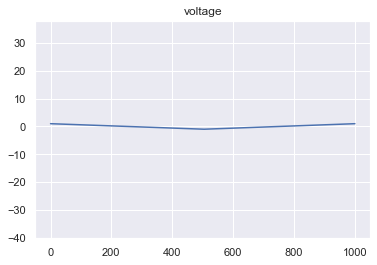

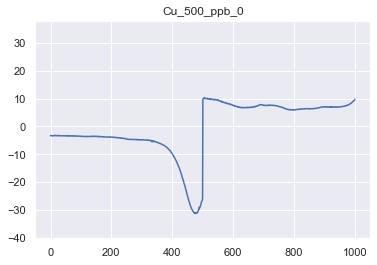

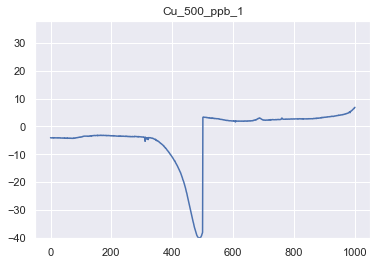

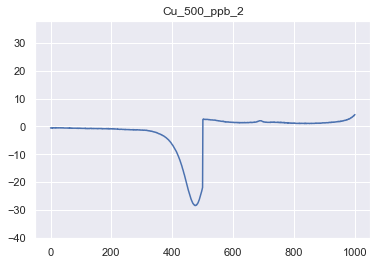

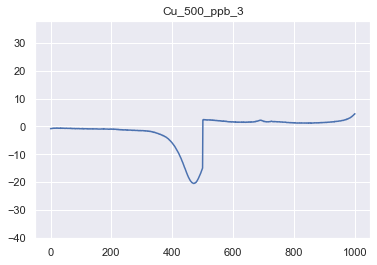

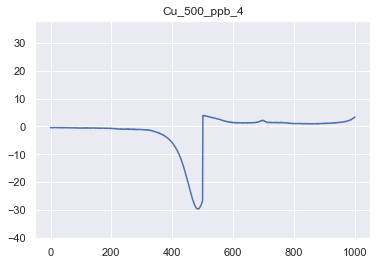

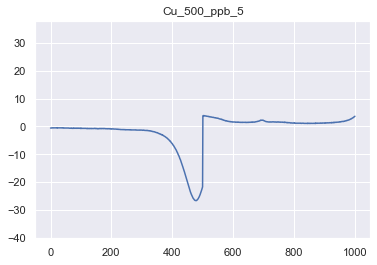

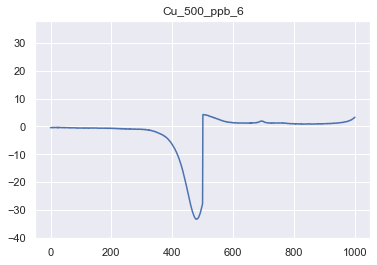

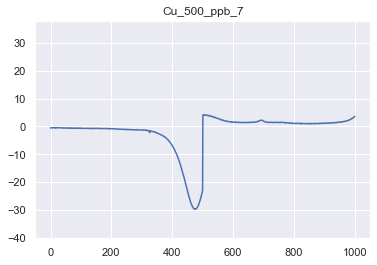

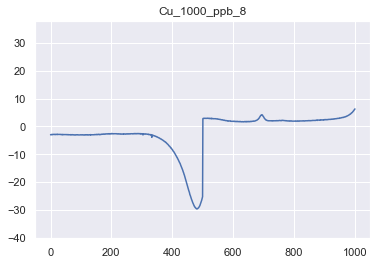

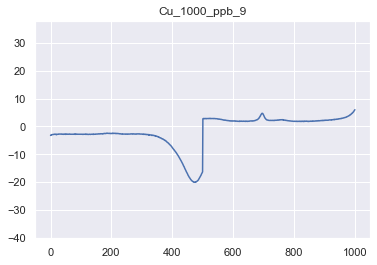

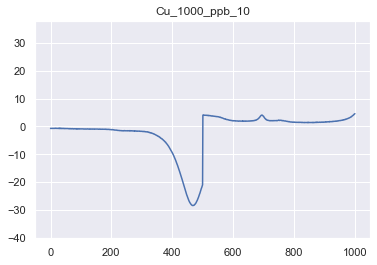

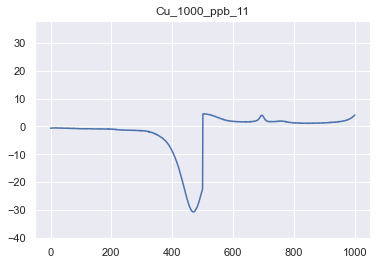

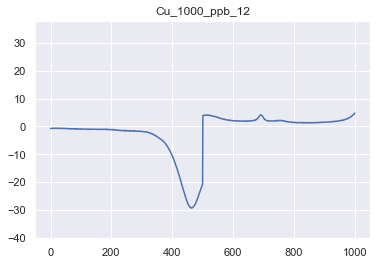

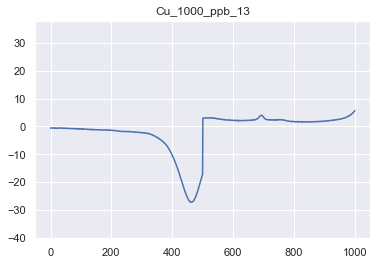

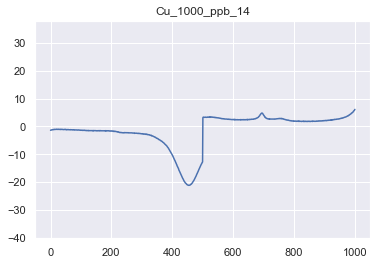

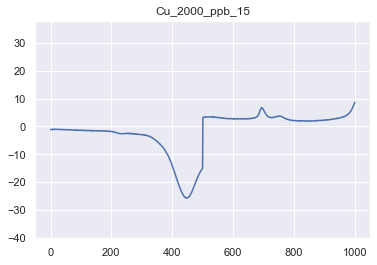

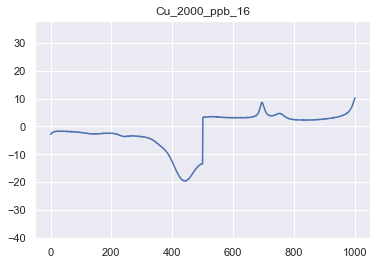

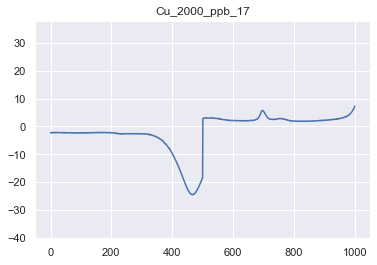

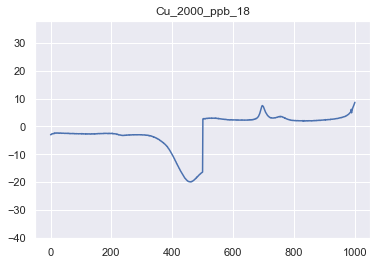

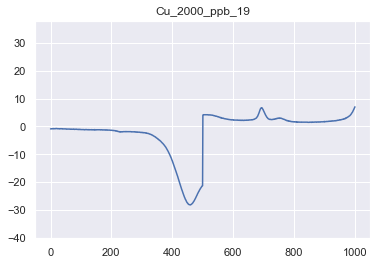

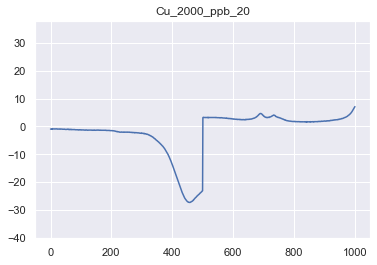

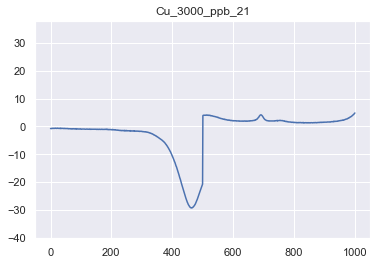

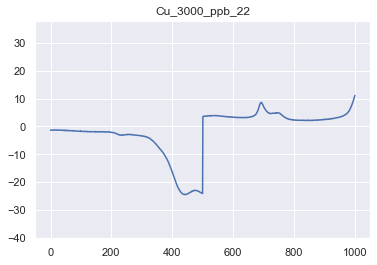

In [28]:
plot_all_cols(copper)

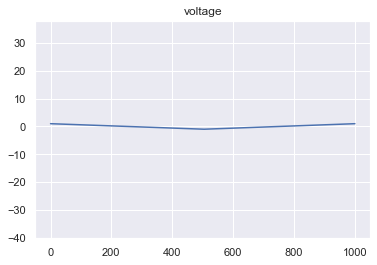

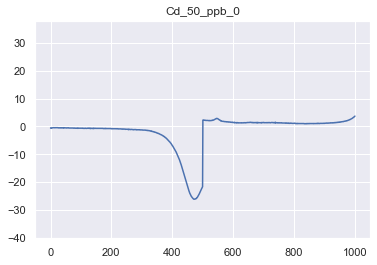

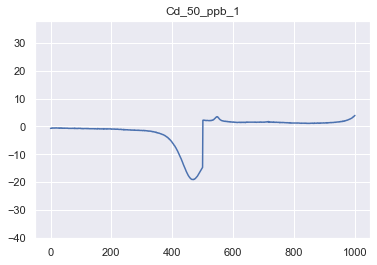

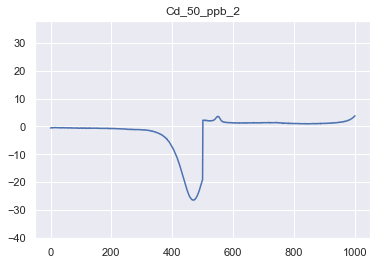

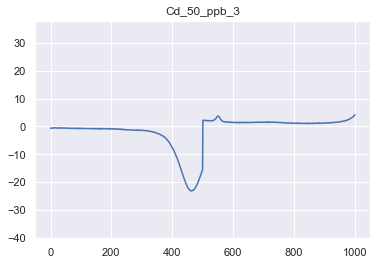

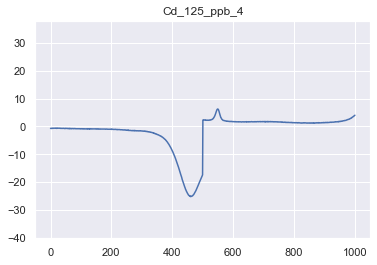

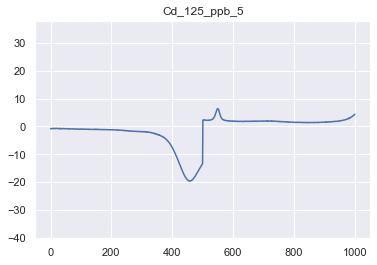

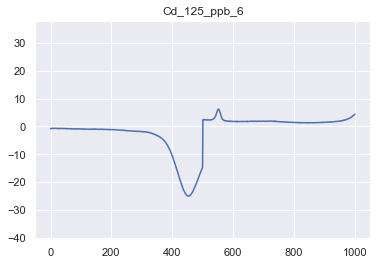

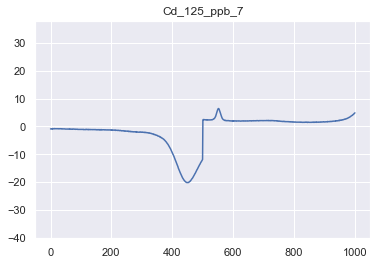

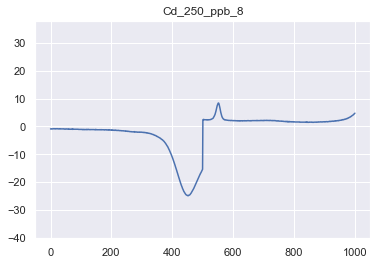

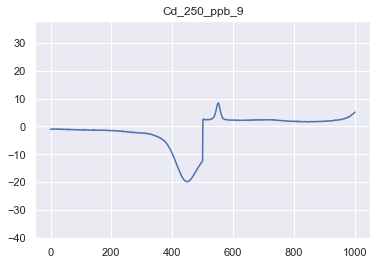

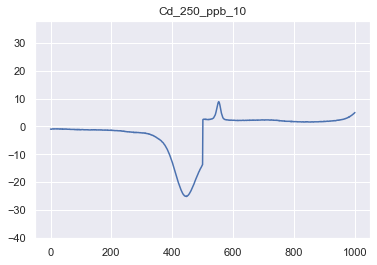

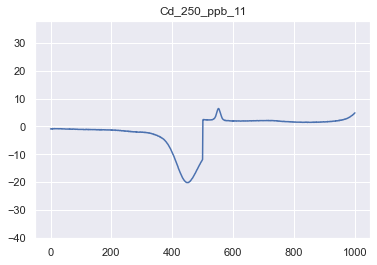

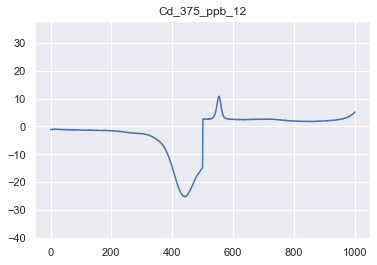

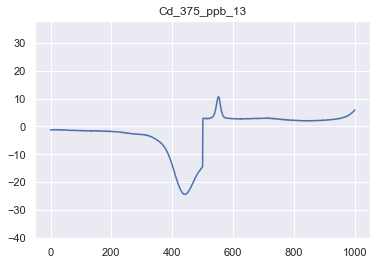

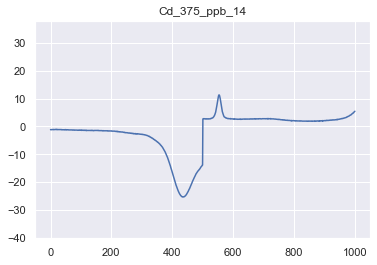

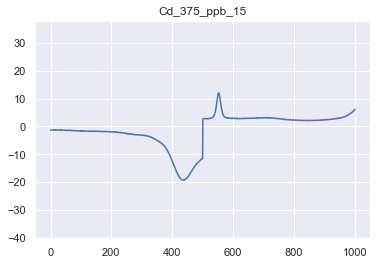

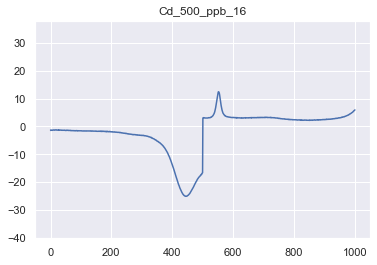

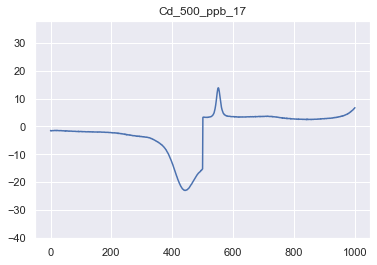

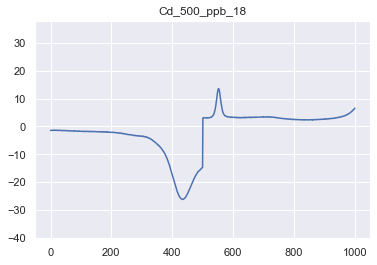

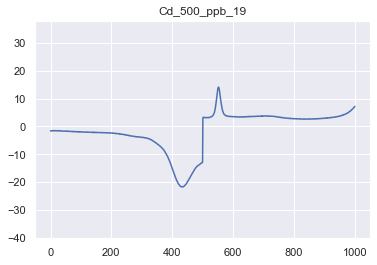

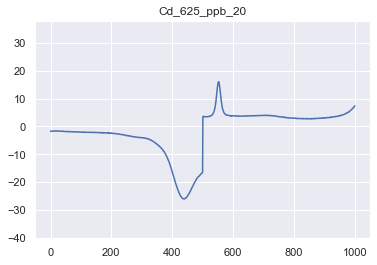

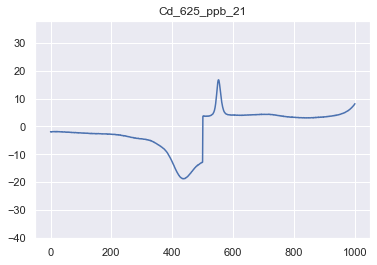

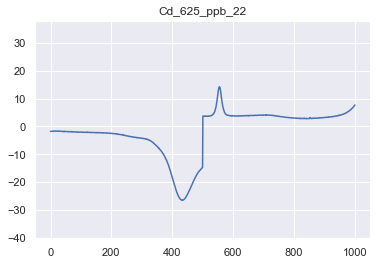

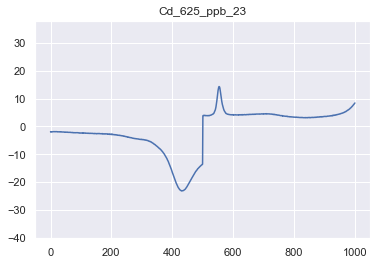

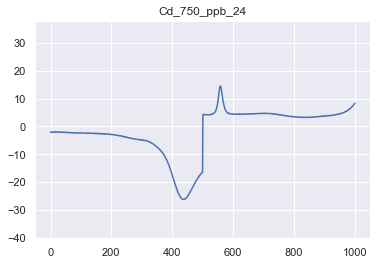

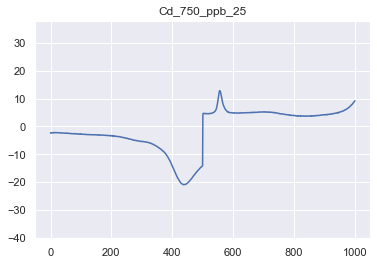

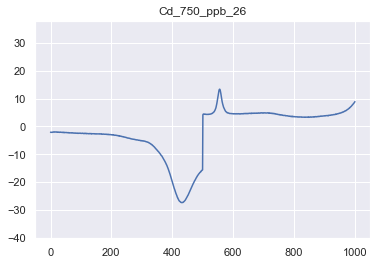

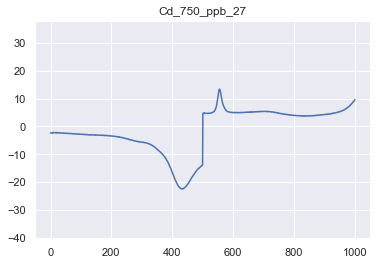

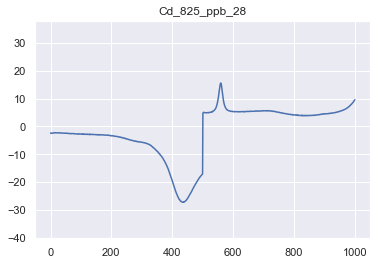

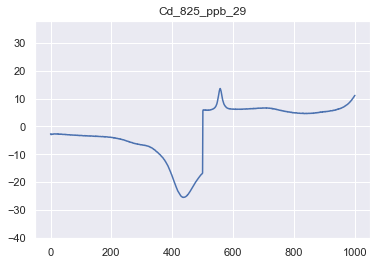

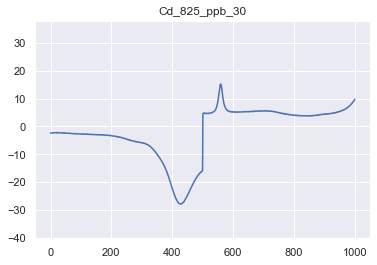

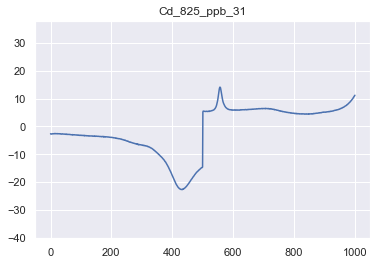

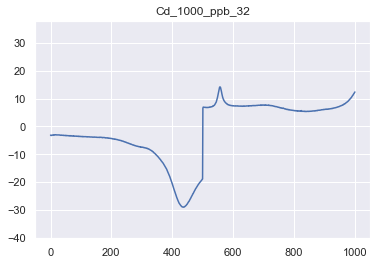

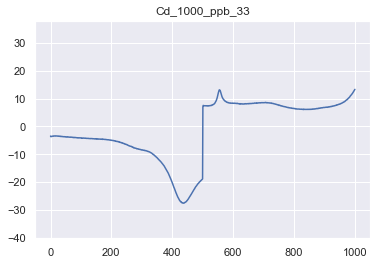

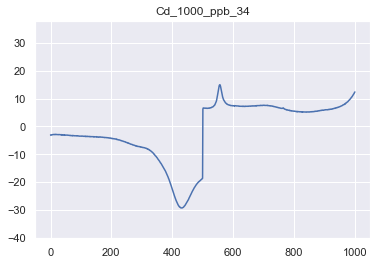

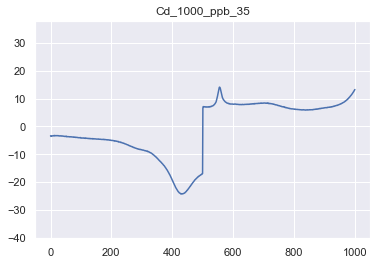

In [29]:
plot_all_cols(cadmium)

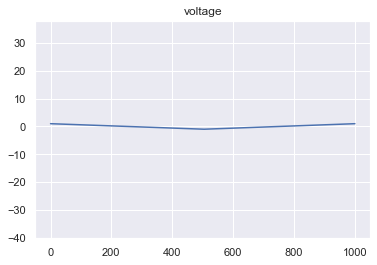

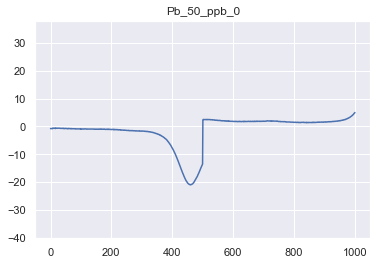

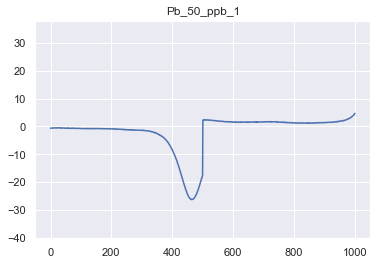

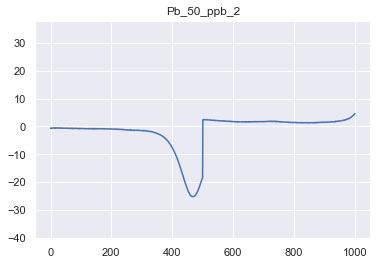

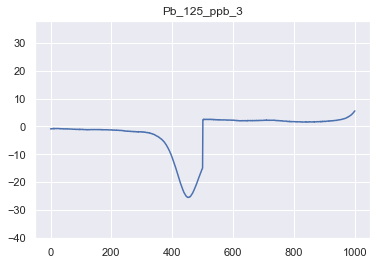

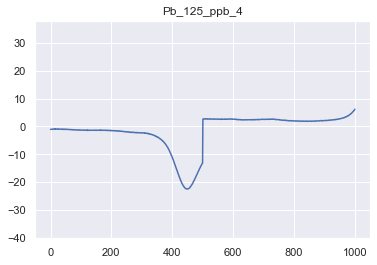

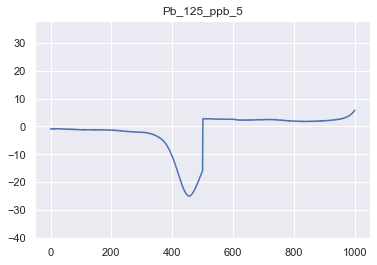

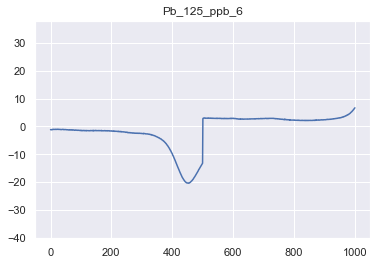

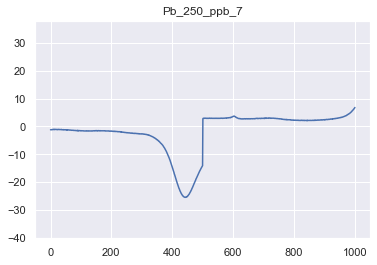

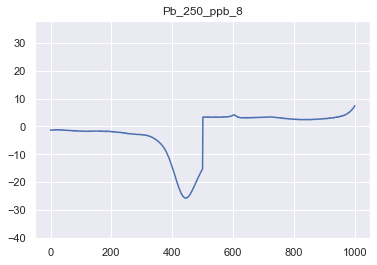

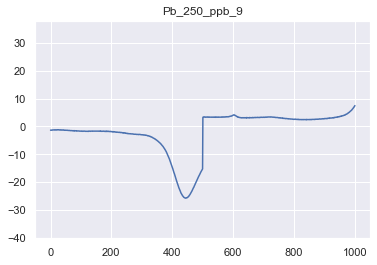

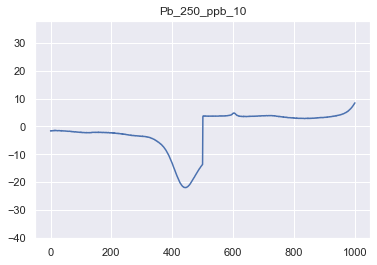

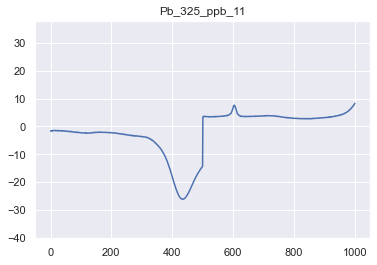

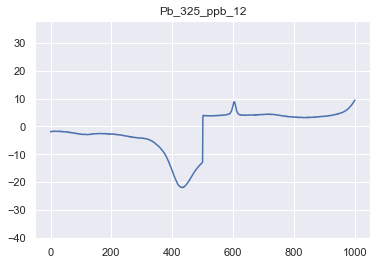

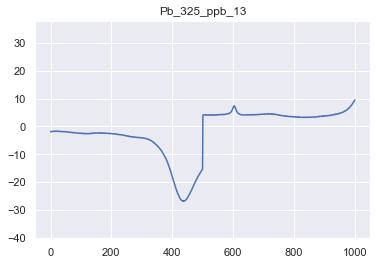

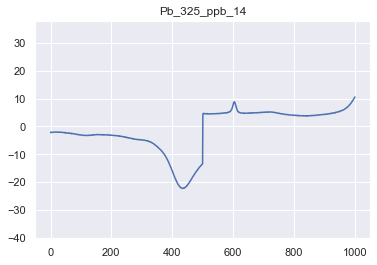

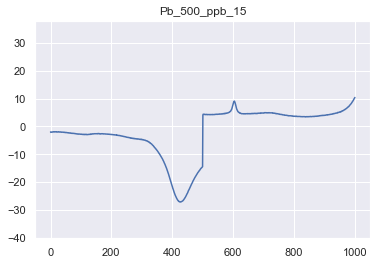

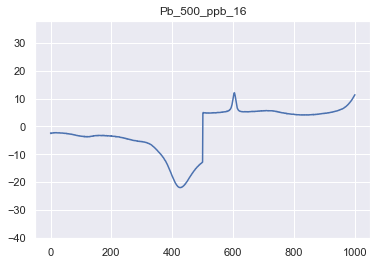

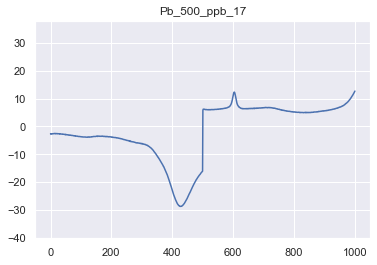

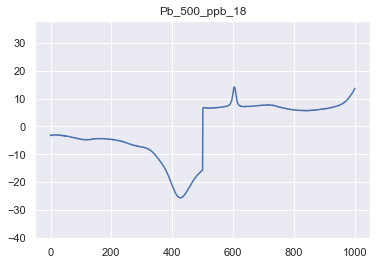

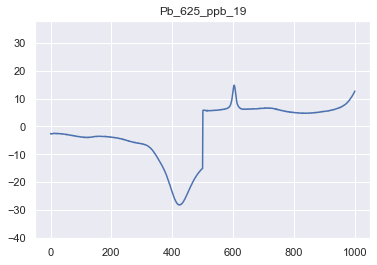

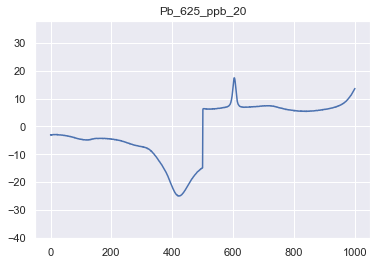

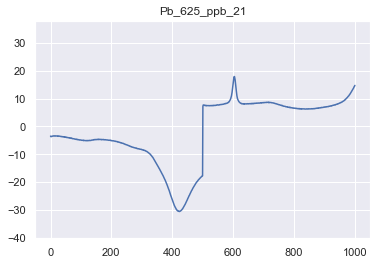

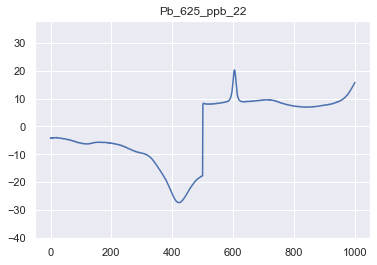

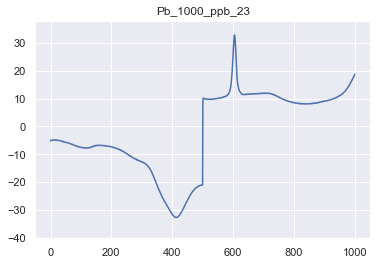

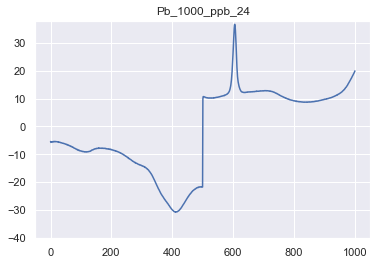

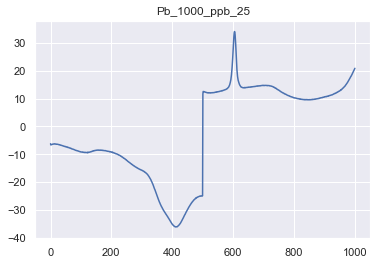

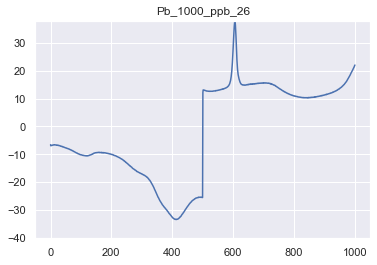

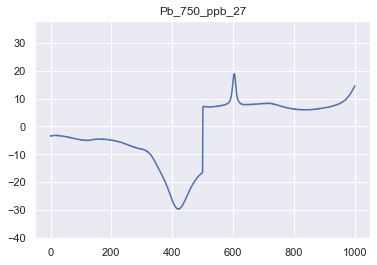

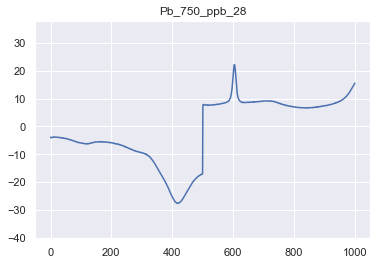

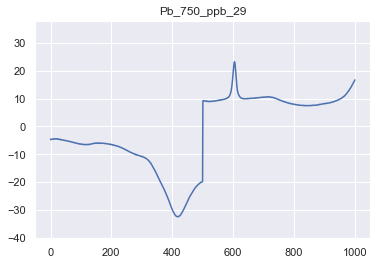

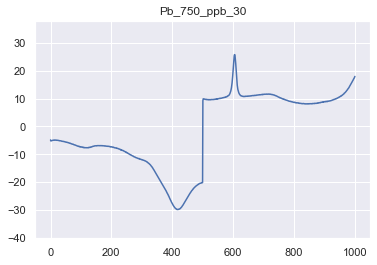

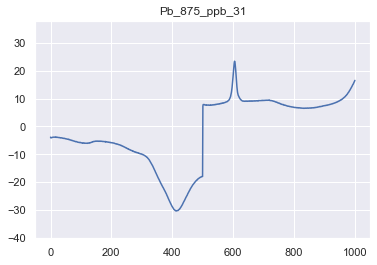

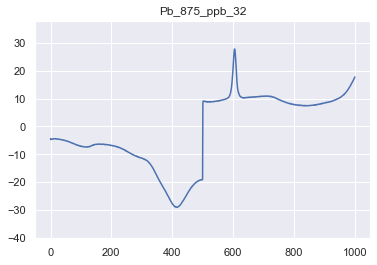

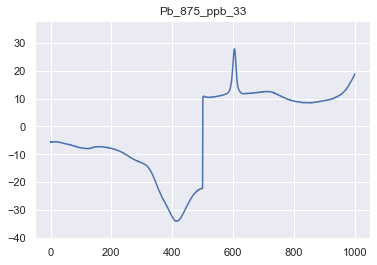

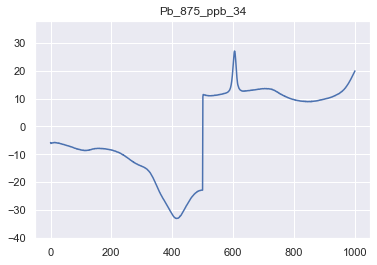

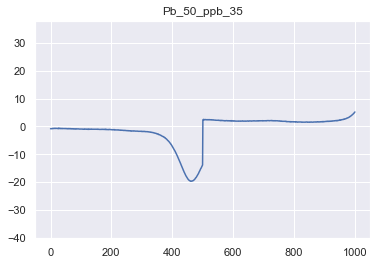

In [30]:
plot_all_cols(lead)

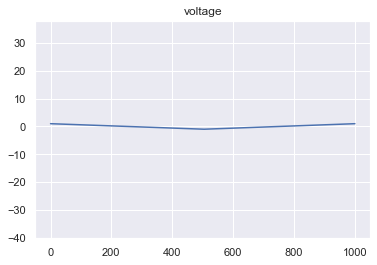

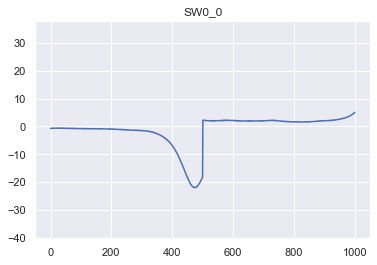

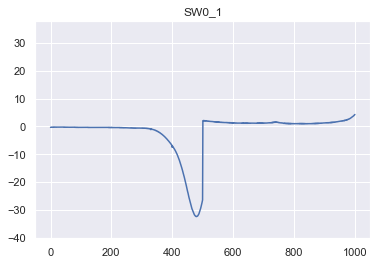

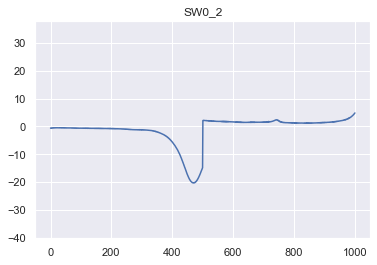

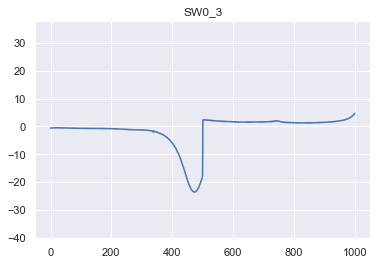

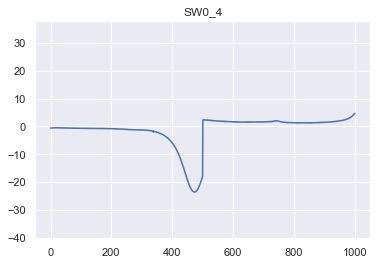

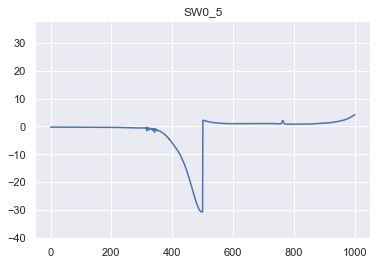

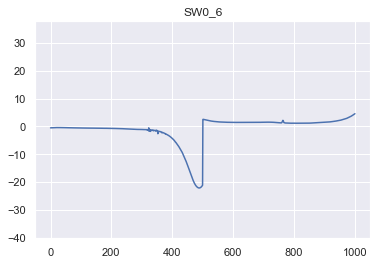

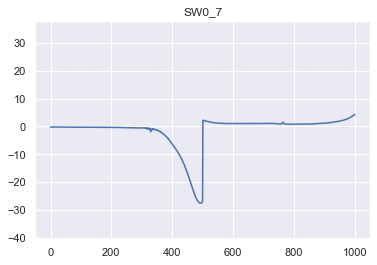

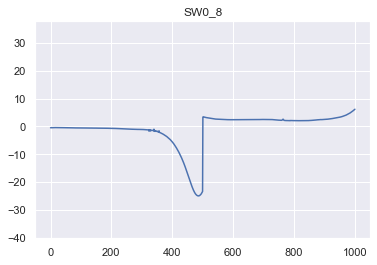

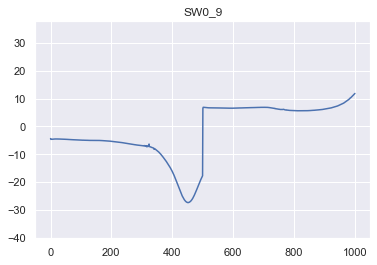

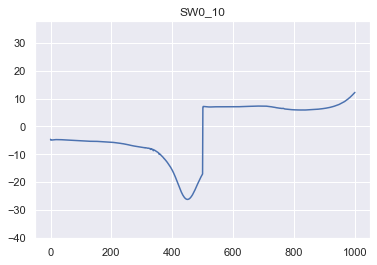

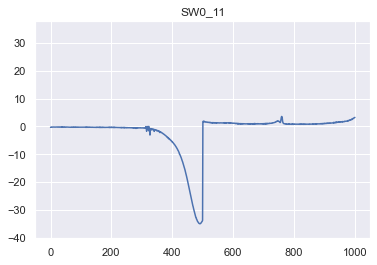

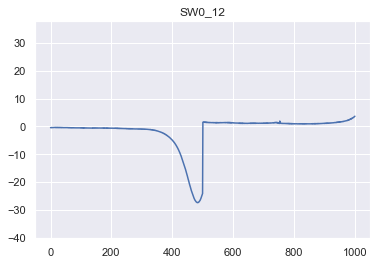

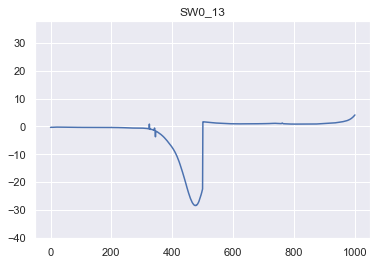

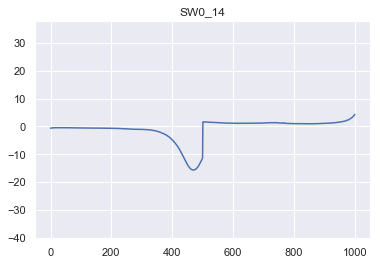

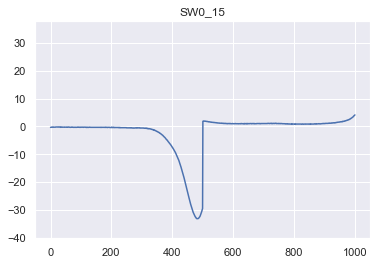

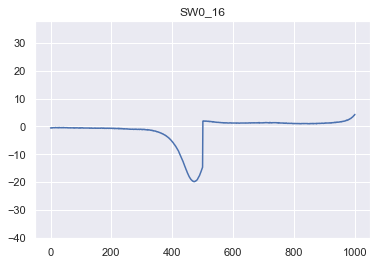

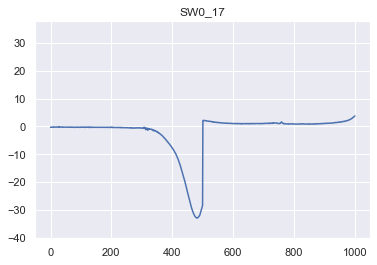

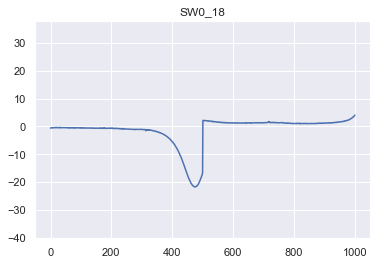

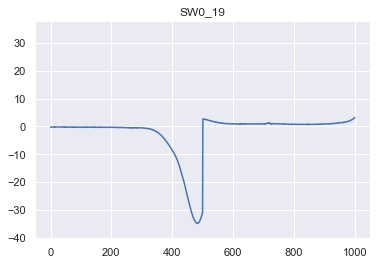

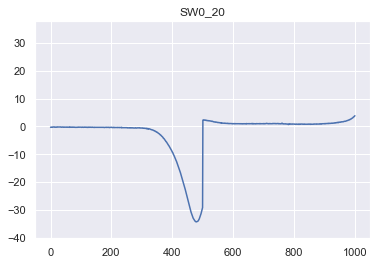

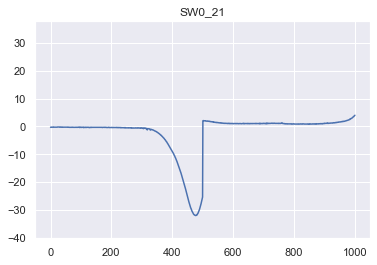

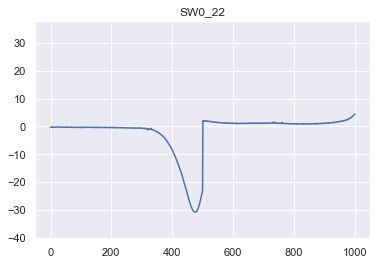

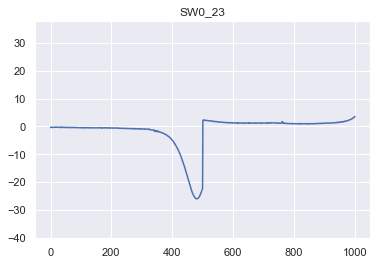

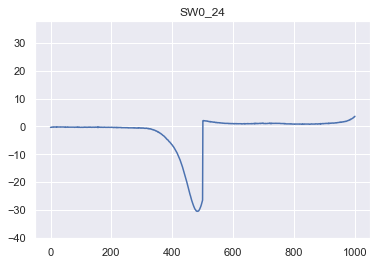

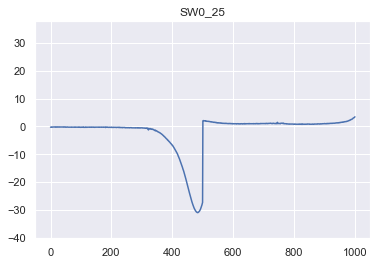

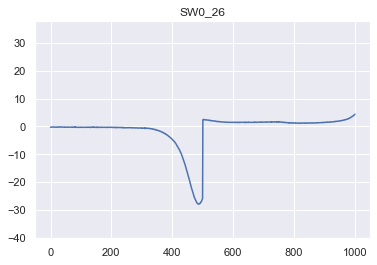

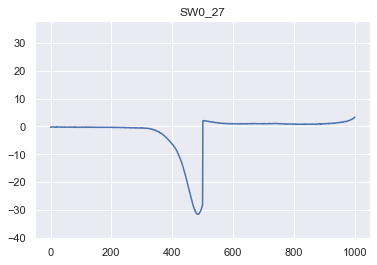

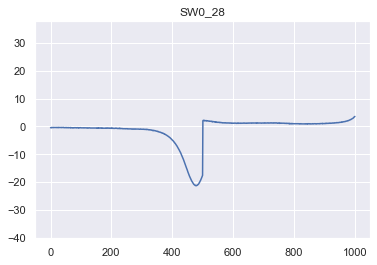

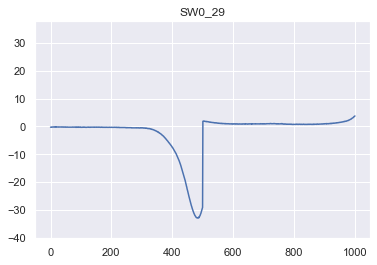

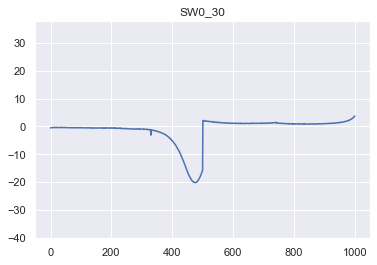

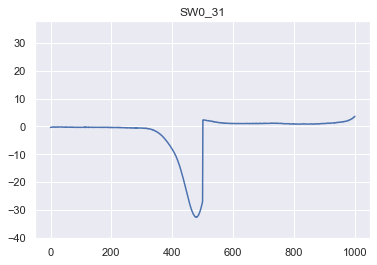

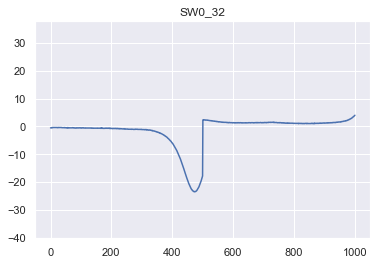

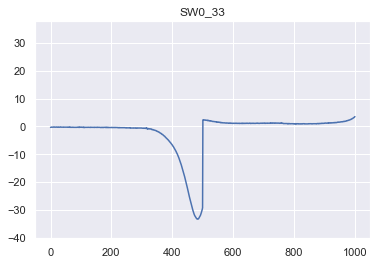

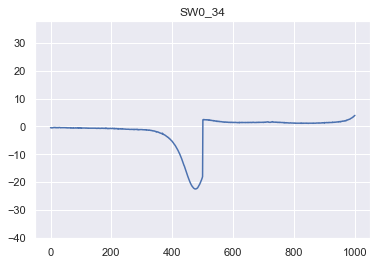

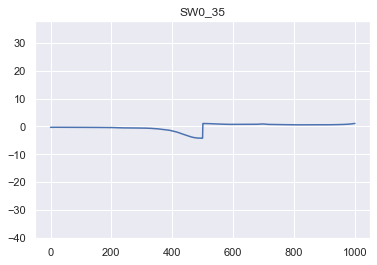

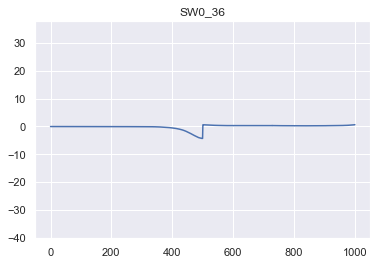

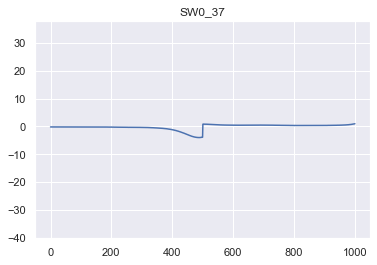

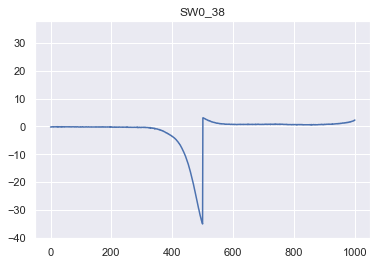

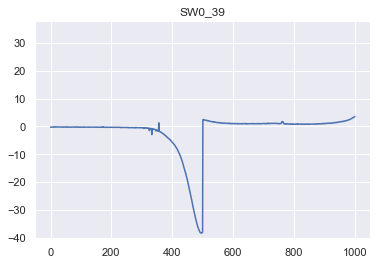

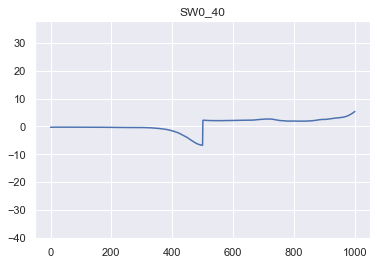

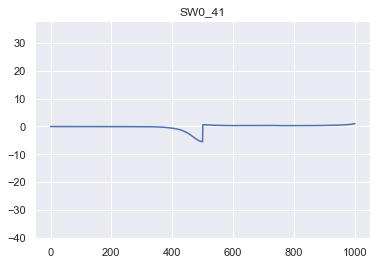

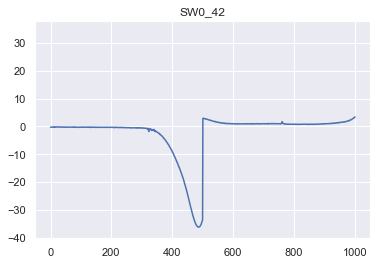

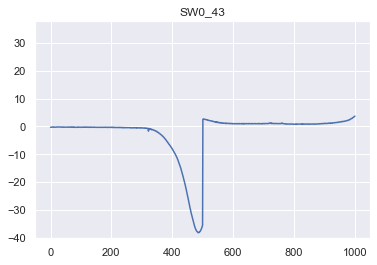

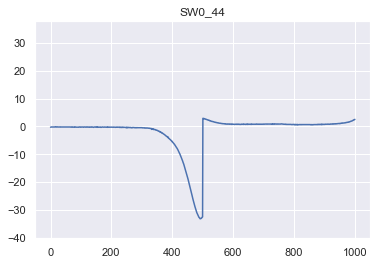

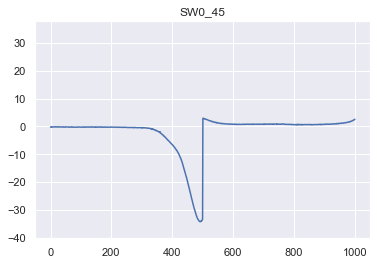

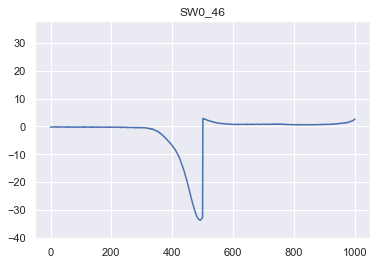

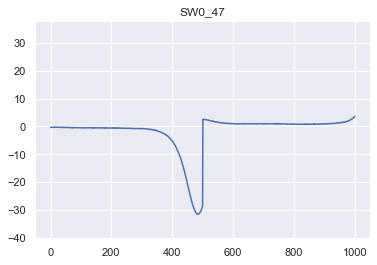

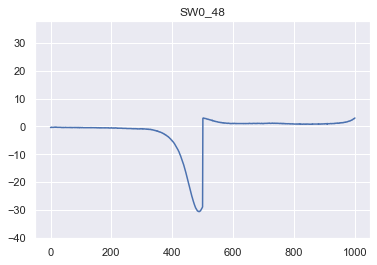

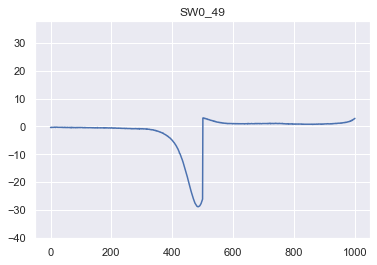

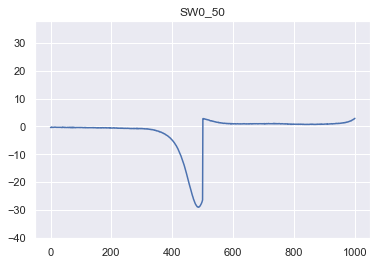

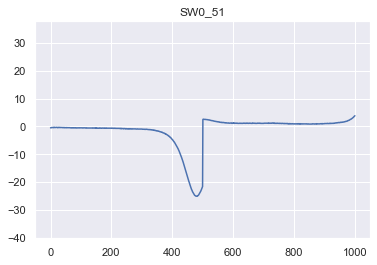

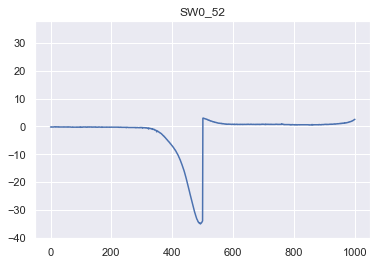

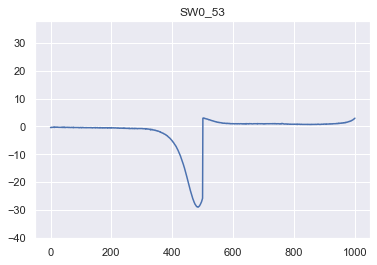

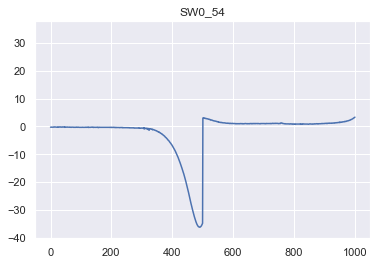

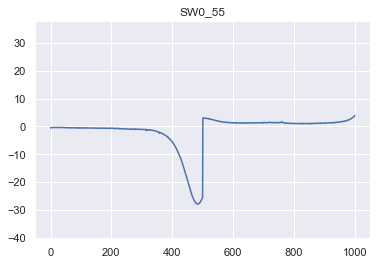

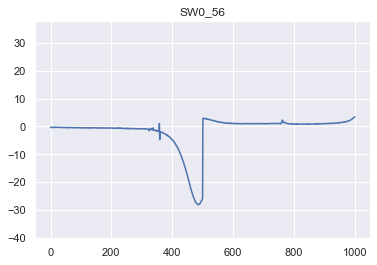

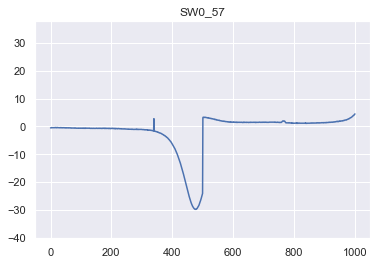

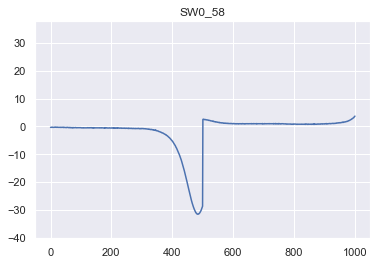

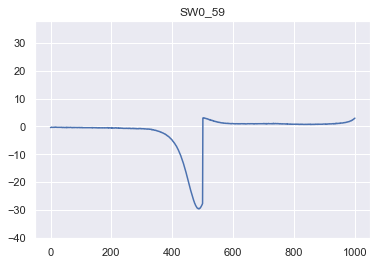

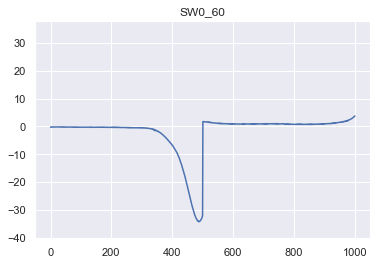

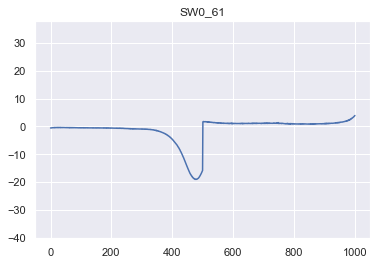

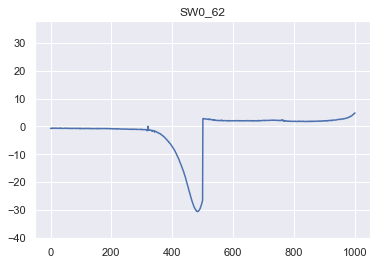

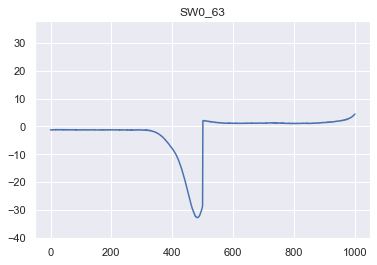

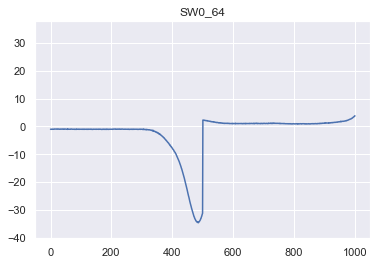

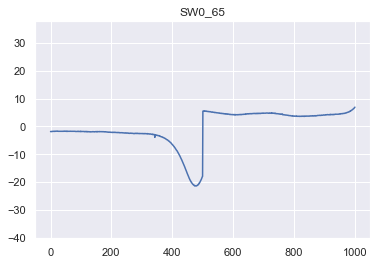

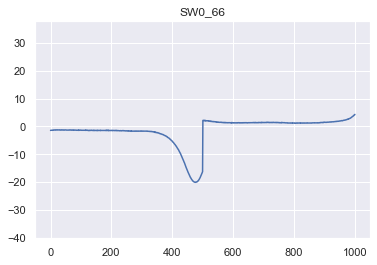

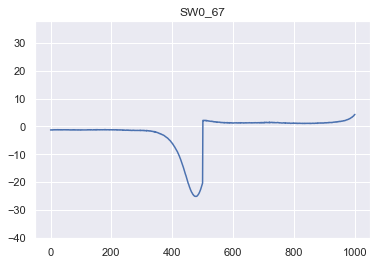

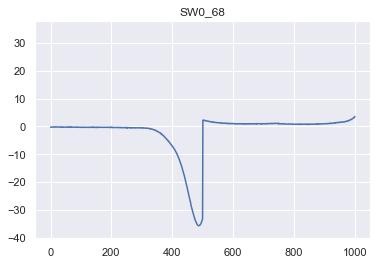

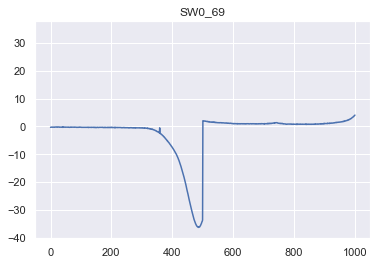

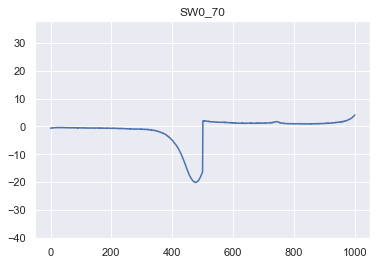

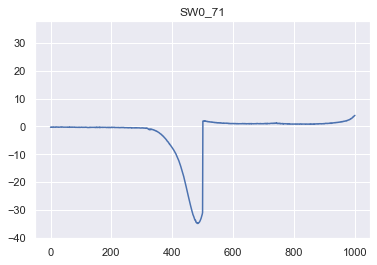

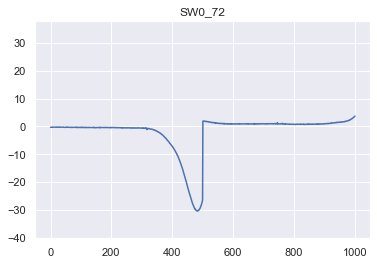

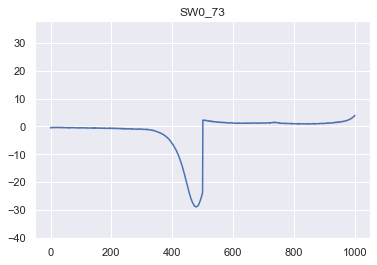

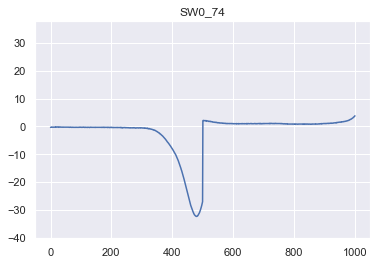

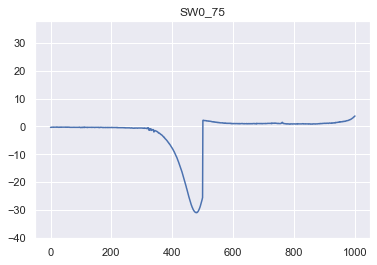

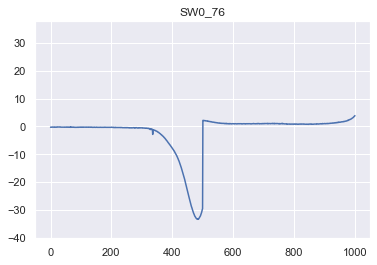

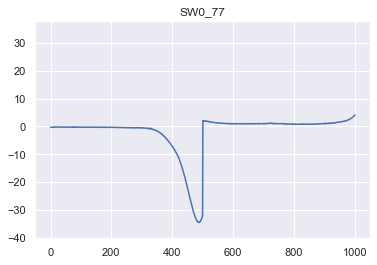

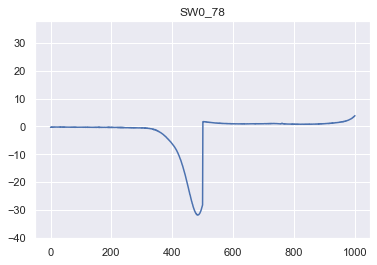

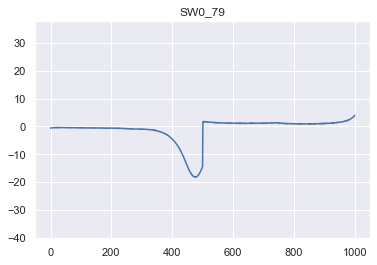

In [31]:
plot_all_cols(seawater)

## Key Findings

Each analyte peaks at a different point in the voltage series. This is great as it shows our data is informative and thus our ML models should be able to classify the analytes with a high degree of precision (indeed, a human could, so a machine is likely also able to given the current advanced state of ML). 

There is a huge correlation between peak size and concentration level. This must be why the client wants to build a model that also predicts concentration level. The high concentration samples should be no problem for ML models (or indeed a manual model looking at the peak size. It will likely be the small concentrations that cause us the most difficulty. 

The seawater samples vary massively. Lots contain noise, there are a variety of shapes too. This noise may confuse the model and we may have to remove the extra noisy samples. There is clearly variation in the seawater samples despite the client saying they are supposed to be a consistent, flat baseline. Will need to prune the samples to select the most suitable ones. 

# Analyte Peaks

Let's find the index ranges that each analyte peaks within. I will use these to create an intelligent baseline model. 

In [47]:
def plot_all_samples_simultaneously(analyte, xlim=None, ylim=None, title=None):
    """Plot all samples in analyte on top of each other to find the peak range.
    Specify the xlim range to make resulting plots easier to interpret

    Parameters
    ----------
    analyte : DataFrame
        DataFrame of an analyte i.e. copper, cadmium, lead or seawater
    xlim : Tuple
        The limits on the x-axis to specify where the plot should focus. Use this
        to zone in on the peak and find it easily.
    ylim: Tuple
        The limits on the y-axis.
    title: String
        The title of the plot.
    """
    for col in analyte:
        if col != 'voltage':
            plt.plot(analyte[col])
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(title)
    plt.show()

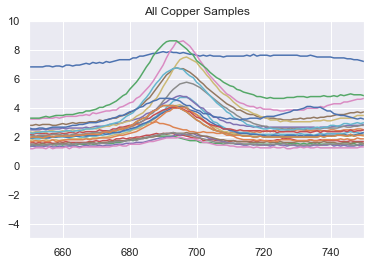

In [52]:
plot_all_samples_simultaneously(copper, (650, 750), (-5, 10), 'All Copper Samples')

Copper peaks in the range [660, 720].

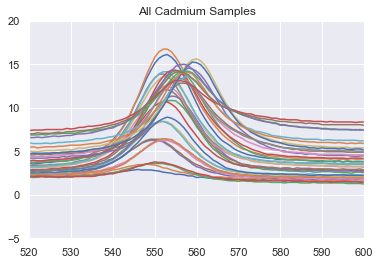

In [53]:
plot_all_samples_simultaneously(cadmium, (520, 600), (-5, 20), 'All Cadmium Samples')

Cadmium peaks in the range [530, 580].

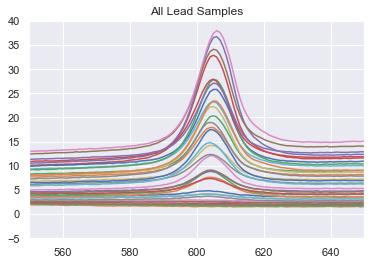

In [50]:
plot_all_samples_simultaneously(lead, (550, 650), (-5, 40), 'All Lead Samples')

Lead peaks in the range [580, 620].

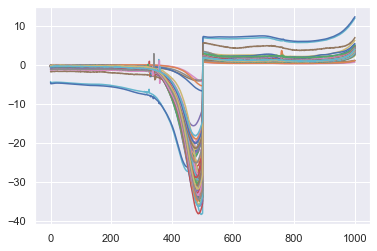

In [51]:
plot_all_samples_simultaneously(seawater)

The peaks for each analyte are at:
- Copper - [660, 720]
- Cadmium - [530, 580]
- Lead - [580, 620]
- Seawater - N/A (it's a flat baseline)

A good baseline model would be one that looks at the max values for each of the three peak ranges and predicts the analyte based off of the max value. 

In [70]:
def plot_low_mid_high_concentration_samples(analyte):
    """For analyte, plot a 1x3 grid showing the difference between samples with 
    low, mid, and high concetrations of that particular analyte.

    Note: this is only meaningful for copper, cadmium, and lead. Seawater has no
          concentration as it is a baseline.

    Parameters
    ----------
    analyte : DataFrame
        DataFrame of an analyte i.e. copper, cadmium, or lead.
    """
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=plt.figaspect(1/3))

    # Get low, mid and high concentration samples based off col position
    low_concentration_sample = analyte.iloc[:, 2]
    mid_concentration_sample = analyte.iloc[:, int(len(analyte.columns)/2)]
    high_concentration_sample = analyte.iloc[:, -2]

    axes[0].plot(low_concentration_sample)
    axes[0].set(title=f'Low Concentration - {low_concentration_sample.name}')

    axes[1].plot(mid_concentration_sample)
    axes[1].set(title=f'Mid Concentration - {mid_concentration_sample.name}')

    axes[2].plot(high_concentration_sample)
    axes[2].set(title=f'High Concentration - {high_concentration_sample.name}')

    plt.tight_layout()
    plt.show()

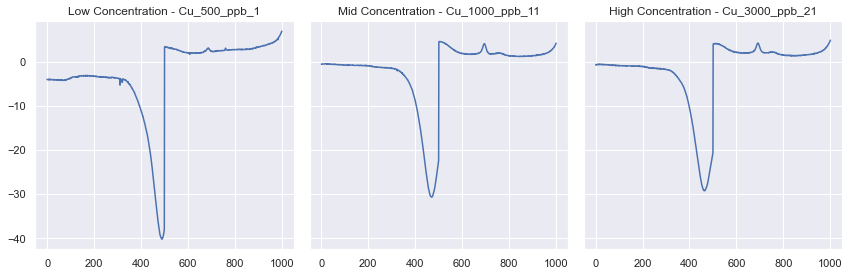

In [71]:
plot_low_mid_high_concentration_samples(copper)

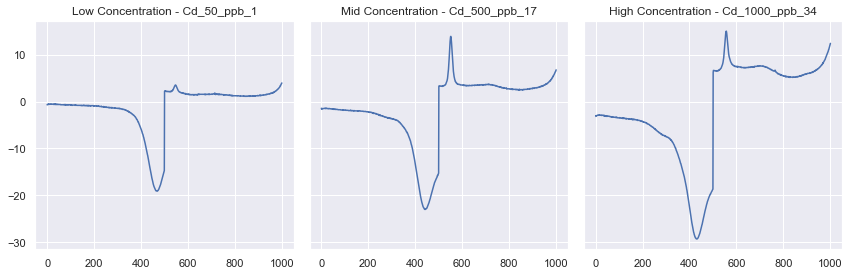

In [72]:
plot_low_mid_high_concentration_samples(cadmium)

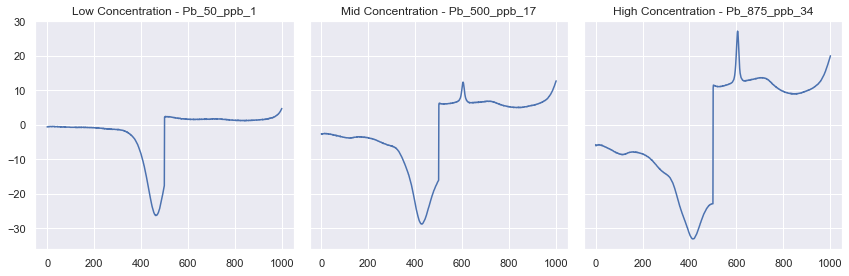

In [73]:
plot_low_mid_high_concentration_samples(lead)

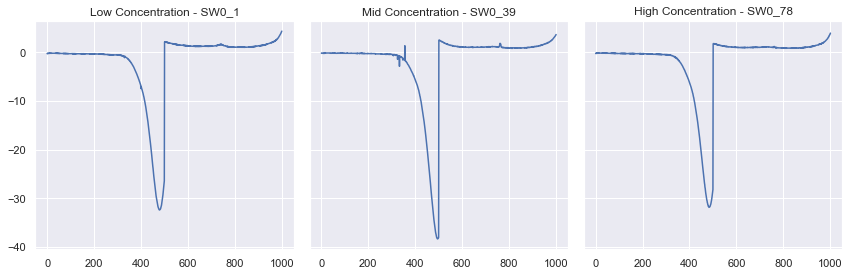

In [74]:
plot_low_mid_high_concentration_samples(seawater)

In [66]:
copper.iloc[:, 2].name

str